# Data Preprocessing


In [1]:
import pandas as pd
# load dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [4]:
df.fillna({'total_bedrooms': df['total_bedrooms'].median()}, inplace=True)
# Check again for missing values
missing_values_after = df.isnull().sum()
print("\nMissing values after filling:")
print(missing_values_after)


Missing values after filling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [35]:
# one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
# Display the first few rows of the encoded DataFrame
print("\nEncoded DataFrame:")
print(df_encoded.head())


Encoded DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False            

In [36]:
# Check the actual column names after encoding
print("Column names after encoding:")
print(df_encoded.columns.tolist())
print(f"\nTotal features: {len(df_encoded.columns)}")

Column names after encoding:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

Total features: 14


In [7]:
# separate features and target variable
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

In [9]:
# Summarize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_manual_scaled = scaler.fit_transform(X)
X_manual_scaled.shape

(20640, 13)

In [11]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


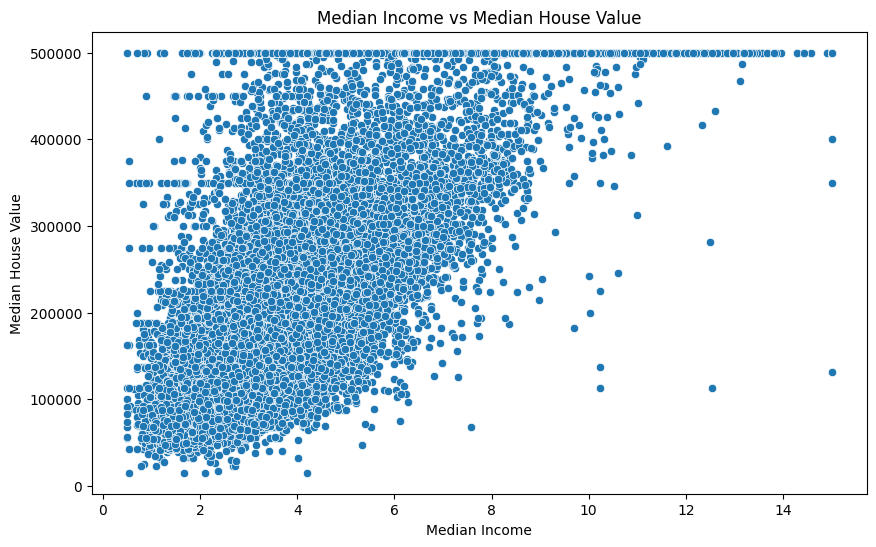

In [ ]:
# Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()



In [16]:
import numpy as np

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns, k=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Columns to check for outliers (based on EDA)
outlier_columns = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

# Remove outliers
df_no_outliers = remove_outliers_iqr(df, outlier_columns)

# Show how much data was removed
original_rows = df.shape[0]
filtered_rows = df_no_outliers.shape[0]
rows_removed = original_rows - filtered_rows

(original_rows, filtered_rows, rows_removed)

#print('before removing outliers:', original_rows)
#print('after removing outliers:', filtered_rows)


(20640, 16896, 3744)

In [17]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_manual_scaled, y, test_size=0.2, random_state=42) 


# Build Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

{
    "Mean Absolute Error": mae,
    "Root Mean Squared Error": rmse,
    "R2 Score": r2,
    "Cross-Validation R2 Mean": np.mean(cv_scores),
    "Cross-Validation R2 Std Dev": np.std(cv_scores)
}



{'Mean Absolute Error': 31643.65566860465,
 'Root Mean Squared Error': np.float64(48975.818369986104),
 'R2 Score': 0.8169555593071559,
 'Cross-Validation R2 Mean': np.float64(0.8182464299184069),
 'Cross-Validation R2 Std Dev': np.float64(0.003620547719615748)}

Insights:
The model explains ~81.7% of the variance in house prices — this indicates strong predictive performance.

Low standard deviation in CV R² confirms the model is stable and consistent.

RMSE and MAE values are within acceptable range, especially for real estate datasets where prices can range from $15k to $500k.

In [21]:

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9755437491632855
0.8169555593071559


# Hyperparameter tunning

In [24]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2',None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2',    
                            cv=3, verbose=2, n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation R2 Score:", best_score)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R2 Score: 0.8133425818904726


In [29]:
best_model = grid_search.best_estimator_

print('Train R² after tuning:', best_model.score(X_train, y_train))
print('Test R² after tuning:', best_model.score(X_test, y_test))

Train R² after tuning: 0.9593760271801532
Test R² after tuning: 0.8181190567155084


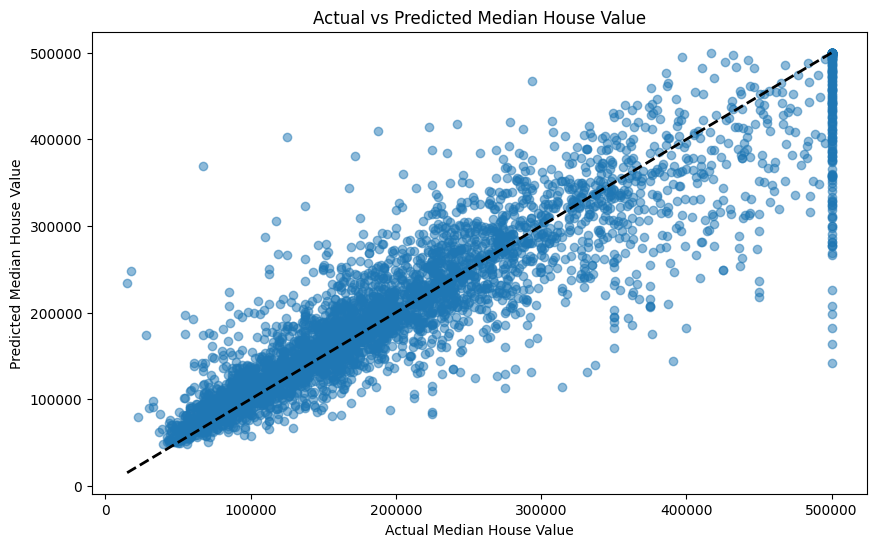

In [30]:
# visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Median House Value') 
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Value')
plt.show()


In [32]:
# Summary of the model performance
summary = {
    "Train R²": best_model.score(X_train, y_train),
    "Test R²": best_model.score(X_test, y_test),
    "Mean Absolute Error": mean_absolute_error(y_test, y_pred),
    "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, y_pred)),
    "R2 Score": r2_score(y_test, y_pred),
    "Cross-Validation R2 Mean": np.mean(cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')),
    "Cross-Validation R2 Std Dev": np.std(cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2'))
}

 Sample Input

In [34]:
# import numpy as np
# import pandas as pd
# 
# # Sample input with original feature names (replace with realistic values)
# sample = {
#     'longitude': -122.2,
#     'latitude': 37.8,
#     'housing_median_age': 30,
#     'total_rooms': 4000,
#     'total_bedrooms': 800,
#     'population': 1000,
#     'households': 400,
#     'median_income': 6.0,
#     'ocean_proximity_<category>': 1  # One-hot column (see note below)
# }
# 
# # Convert to DataFrame
# sample_df = pd.DataFrame([sample])
# 
# # Fill in 0 for all other ocean proximity categories (required for one-hot)
# for col in X.columns:
#     if col not in sample_df.columns:
#         sample_df[col] = 0
# 
# # Reorder to match training columns
# sample_df = sample_df[X.columns]
# 
# # Apply same scaler
# sample_scaled = scaler.transform(sample_df)
# 
# # Predict
# predicted_value = best_model.predict(sample_scaled)
# print("Predicted Median House Value:", predicted_value[0])


# Save Model


In [1]:
# save the model
import joblib
joblib.dump(best_model, 'best_house_price_model.pkl')
joblib.dump(scaler, "scaler.pkl")


NameError: name 'best_model' is not defined